# Import Library

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpig
from keras_preprocessing.image import ImageDataGenerator

# Read Data

### Membuat variable untuk menetapkan path dataset

In [19]:
train_path = r'./../PAKB/data/train'
test_path = r'./../PAKB/data/test'
val_path = r'./../PAKB/data/val' 

# DATA PREPROCESSING

## Augmented Data

### Membuat variabel datagen untuk deklarasi ImageDataGenerator

In [20]:
IMG_PATH='data'
train_datagen = ImageDataGenerator(
    IMG_PATH,
    rescale=1./255, 
    rotation_range = 0.45,
    width_shift_range= 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(
    IMG_PATH,
    rescale=1./255
)


# Load Data

In [21]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    seed = 1000,
    target_size = (40,40), #Reshape
    shuffle=True,
    batch_size = 128,
    class_mode ='binary'
    
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    seed = 1000,
    target_size = (40,40),#Reshape
    shuffle=True,
    batch_size = 128,
    class_mode ='binary'
    
)

val_generator = test_datagen.flow_from_directory(
   val_path,
    seed = 1000,
    target_size = (40,40), #Reshape
    shuffle=True,
    batch_size = 128,
    class_mode ='binary'
    
)


Found 8643 images belonging to 2 classes.
Found 578 images belonging to 2 classes.
Found 2304 images belonging to 2 classes.


In [22]:
img, label = train_generator.next()


C:\Users\In The\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


# DATA ANALYSIS & VISUALIZATION

(128, 40, 40, 3)


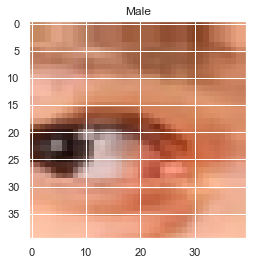

(128, 40, 40, 3)


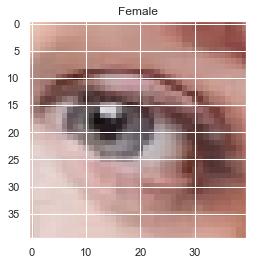

(128, 40, 40, 3)


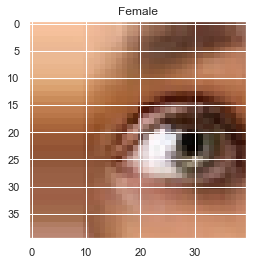

(128, 40, 40, 3)


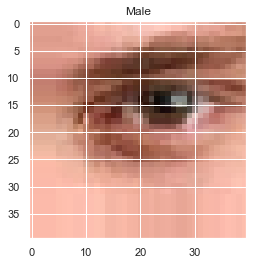

(128, 40, 40, 3)


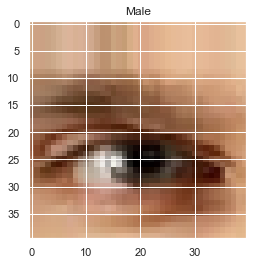

In [23]:
for _ in range(5):
    img, label = train_generator.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    if(label[0] == 0.0):
        plt.title("Female")
    else:
        plt.title("Male")
    plt.show()

# DATA MODELING

## Arsitektur Model

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=[40,40,3]),
    tf.keras.layers.MaxPooling2D(3,3),
    
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(3,3),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'), #tambahkan layer biar akurasinya naik
    tf.keras.layers.Dense(1, activation='sigmoid') #2 class wanita pria
])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 38, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 144)               0         
                                                                 
 dense (Dense)               (None, 32)                4

## Compiling Model

In [26]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',
metrics=['accuracy'])

## Modelling Epoch

In [27]:
hasil = model.fit(train_generator, epochs=40, validation_data=val_generator) #overfitting itu saat nilai akurasi dengan val akurasinya nilainya beda jauh

Epoch 1/40
68/68 [==============================] - 20s 275ms/step - loss: 0.6809 - accuracy: 0.5640 - val_loss: 0.6607 - val_accuracy: 0.6211
Epoch 2/40
68/68 [==============================] - 18s 260ms/step - loss: 0.6549 - accuracy: 0.6174 - val_loss: 0.7093 - val_accuracy: 0.5286
Epoch 3/40
68/68 [==============================] - 17s 251ms/step - loss: 0.6282 - accuracy: 0.6510 - val_loss: 0.5965 - val_accuracy: 0.6927
Epoch 4/40
68/68 [==============================] - 16s 240ms/step - loss: 0.6130 - accuracy: 0.6640 - val_loss: 0.5679 - val_accuracy: 0.7148
Epoch 5/40
68/68 [==============================] - 16s 232ms/step - loss: 0.5994 - accuracy: 0.6806 - val_loss: 0.5245 - val_accuracy: 0.7517
Epoch 6/40
68/68 [==============================] - 17s 244ms/step - loss: 0.5686 - accuracy: 0.7047 - val_loss: 0.5018 - val_accuracy: 0.7713
Epoch 7/40
68/68 [==============================] - 17s 243ms/step - loss: 0.5619 - accuracy: 0.7150 - val_loss: 0.4814 - val_accuracy: 0.7891

## Bandingkan Perkembangan Epoch

In [40]:
y_acc_train = hasil.history['accuracy']
y_acc_val = hasil.history['val_accuracy']
y_loss_train = hasil.history['loss']
y_loss_val = hasil.history['val_loss']
x = range(len(y_acc_train))

Text(0, 0.5, 'loss')

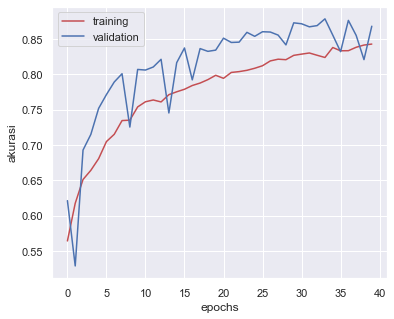

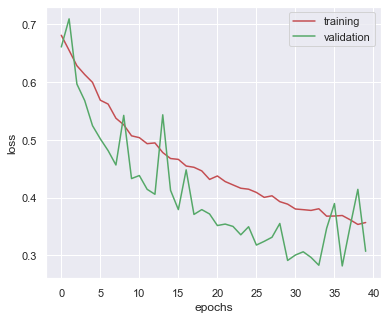

In [41]:
plt.figure(1, figsize=(6,5))
plt.plot(x,y_acc_train, c='r', label =  'training')
plt.plot(x,y_acc_val, c='b', label =  'validation')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('akurasi')

plt.figure(2, figsize=(6,5))
plt.plot(x,y_loss_train, c='r', label =  'training')
plt.plot(x,y_loss_val, c='g', label =  'validation')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

## Evaluasi Test Set

In [42]:
model.evaluate(test_generator)

C:\Users\In The\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


5/5 [==============================] - 11s 3s/step - loss: 0.2754 - accuracy: 0.8841


[0.27539926767349243, 0.8840830326080322]

## Predict Data

In [43]:
def predict_image(image_path):
    img = keras.preprocessing.image.load_img(image_path, target_size=[40,40])
    img_array = keras.preprocessing.image.img_to_array(img)

    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    score = predictions[0]
    print("This image is %.2f percent female and %.2f percent male." % (100 * (1 - score), 100 * score))
    plt.imshow(img);

1/1 [==============================] - 0s 24ms/step
This image is 0.00 percent female and 100.00 percent male.


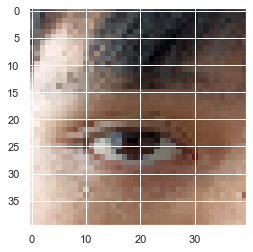

In [44]:
predict_image("mata alan.jpeg") 

1/1 [==============================] - 0s 26ms/step
This image is 0.00 percent female and 100.00 percent male.


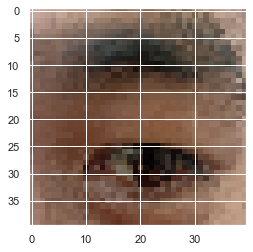

In [45]:
predict_image("mata ghozali.jpeg")

1/1 [==============================] - 0s 24ms/step
This image is 100.00 percent female and 0.00 percent male.


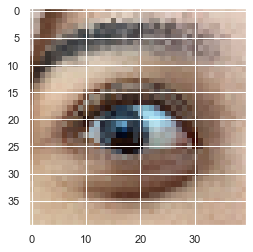

In [46]:
predict_image("mata mita.jpeg")

1/1 [==============================] - 0s 24ms/step
This image is 100.00 percent female and 0.00 percent male.


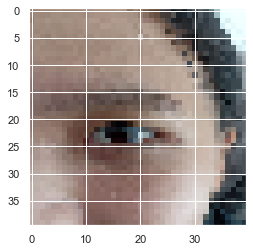

In [47]:
predict_image("mata mira.jpeg")

1/1 [==============================] - 0s 23ms/step
This image is 100.00 percent female and 0.00 percent male.


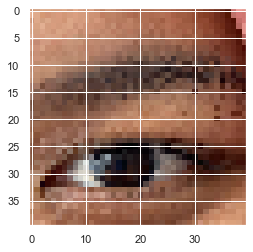

In [48]:
predict_image("mata fathia.jpeg")

1/1 [==============================] - 0s 24ms/step
This image is 100.00 percent female and 0.00 percent male.


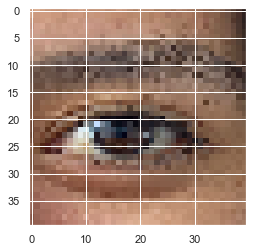

In [49]:
predict_image("mata cantika.jpeg")

1/1 [==============================] - 0s 24ms/step
This image is 100.00 percent female and 0.00 percent male.


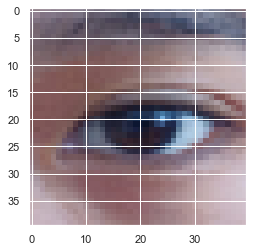

In [50]:
predict_image("mata hera.jpeg")

1/1 [==============================] - 0s 26ms/step
This image is 0.00 percent female and 100.00 percent male.


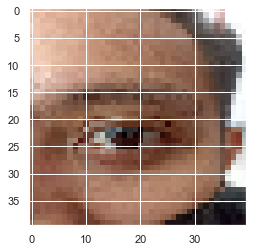

In [51]:
predict_image("mata amri.jpeg")

### Simpan Model Yang Sudah Di Training

In [39]:
model.save("./model/model_finished")
model.save("./model/model_finished.h5")

INFO:tensorflow:Assets written to: ./model/model_finished\assets


INFO:tensorflow:Assets written to: ./model/model_finished\assets
